# Import library

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline 

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.preprocessing import LabelEncoder

In [2]:
# Impoer Dataset
df = pd.read_csv("C:/Users/SANJAY/Desktop/ExcelR/Assignments/Assignment - 14/Decision trees/Company_Data.csv")
df.head()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No


# EDA

In [3]:
df.shape

(400, 11)

In [4]:
df.info

<bound method DataFrame.info of      Sales  CompPrice  Income  Advertising  Population  Price ShelveLoc  Age  \
0     9.50        138      73           11         276    120       Bad   42   
1    11.22        111      48           16         260     83      Good   65   
2    10.06        113      35           10         269     80    Medium   59   
3     7.40        117     100            4         466     97    Medium   55   
4     4.15        141      64            3         340    128       Bad   38   
..     ...        ...     ...          ...         ...    ...       ...  ...   
395  12.57        138     108           17         203    128      Good   33   
396   6.14        139      23            3          37    120    Medium   55   
397   7.41        162      26           12         368    159    Medium   40   
398   5.94        100      79            7         284     95       Bad   50   
399   9.71        134      37            0          27    120      Good   49   

     Ed

In [5]:
df.isnull().any()

Sales          False
CompPrice      False
Income         False
Advertising    False
Population     False
Price          False
ShelveLoc      False
Age            False
Education      False
Urban          False
US             False
dtype: bool

In [6]:
# Converting the categorical columns into numeric columns using Label encoding
cols = ['ShelveLoc','Urban','US']

df[cols] = df[cols].apply(LabelEncoder().fit_transform)
df.head()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,0,42,17,1,1
1,11.22,111,48,16,260,83,1,65,10,1,1
2,10.06,113,35,10,269,80,2,59,12,1,1
3,7.40,117,100,4,466,97,2,55,14,1,1
4,4.15,141,64,3,340,128,0,38,13,1,0


In [7]:
df.describe()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,7.496325,124.975000,68.657500,6.635000,264.840000,115.795000,1.307500,53.322500,13.900000,0.705000,0.645000
std,2.824115,15.334512,27.986037,6.650364,147.376436,23.676664,0.833475,16.200297,2.620528,0.456614,0.479113
min,0.000000,77.000000,21.000000,0.000000,10.000000,24.000000,0.000000,25.000000,10.000000,0.000000,0.000000
25%,5.390000,115.000000,42.750000,0.000000,139.000000,100.000000,1.000000,39.750000,12.000000,0.000000,0.000000
50%,7.490000,125.000000,69.000000,5.000000,272.000000,117.000000,2.000000,54.500000,14.000000,1.000000,1.000000
75%,9.320000,135.000000,91.000000,12.000000,398.500000,131.000000,2.000000,66.000000,16.000000,1.000000,1.000000
max,16.270000,175.000000,120.000000,29.000000,509.000000,191.000000,2.000000,80.000000,18.000000,1.000000,1.000000


In [8]:
# Converting the sales column into categorical column based on the 50th percentile value (7.49)(below 50th perc- Low, above 50th prec- High)
sales_cat=[]
for value in df['Sales']:
    if value > 7.49:
        sales_cat.append("High")
    else:
        sales_cat.append("Low")
df['Sales'] = sales_cat
df.head()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,High,138,73,11,276,120,0,42,17,1,1
1,High,111,48,16,260,83,1,65,10,1,1
2,High,113,35,10,269,80,2,59,12,1,1
3,Low,117,100,4,466,97,2,55,14,1,1
4,Low,141,64,3,340,128,0,38,13,1,0


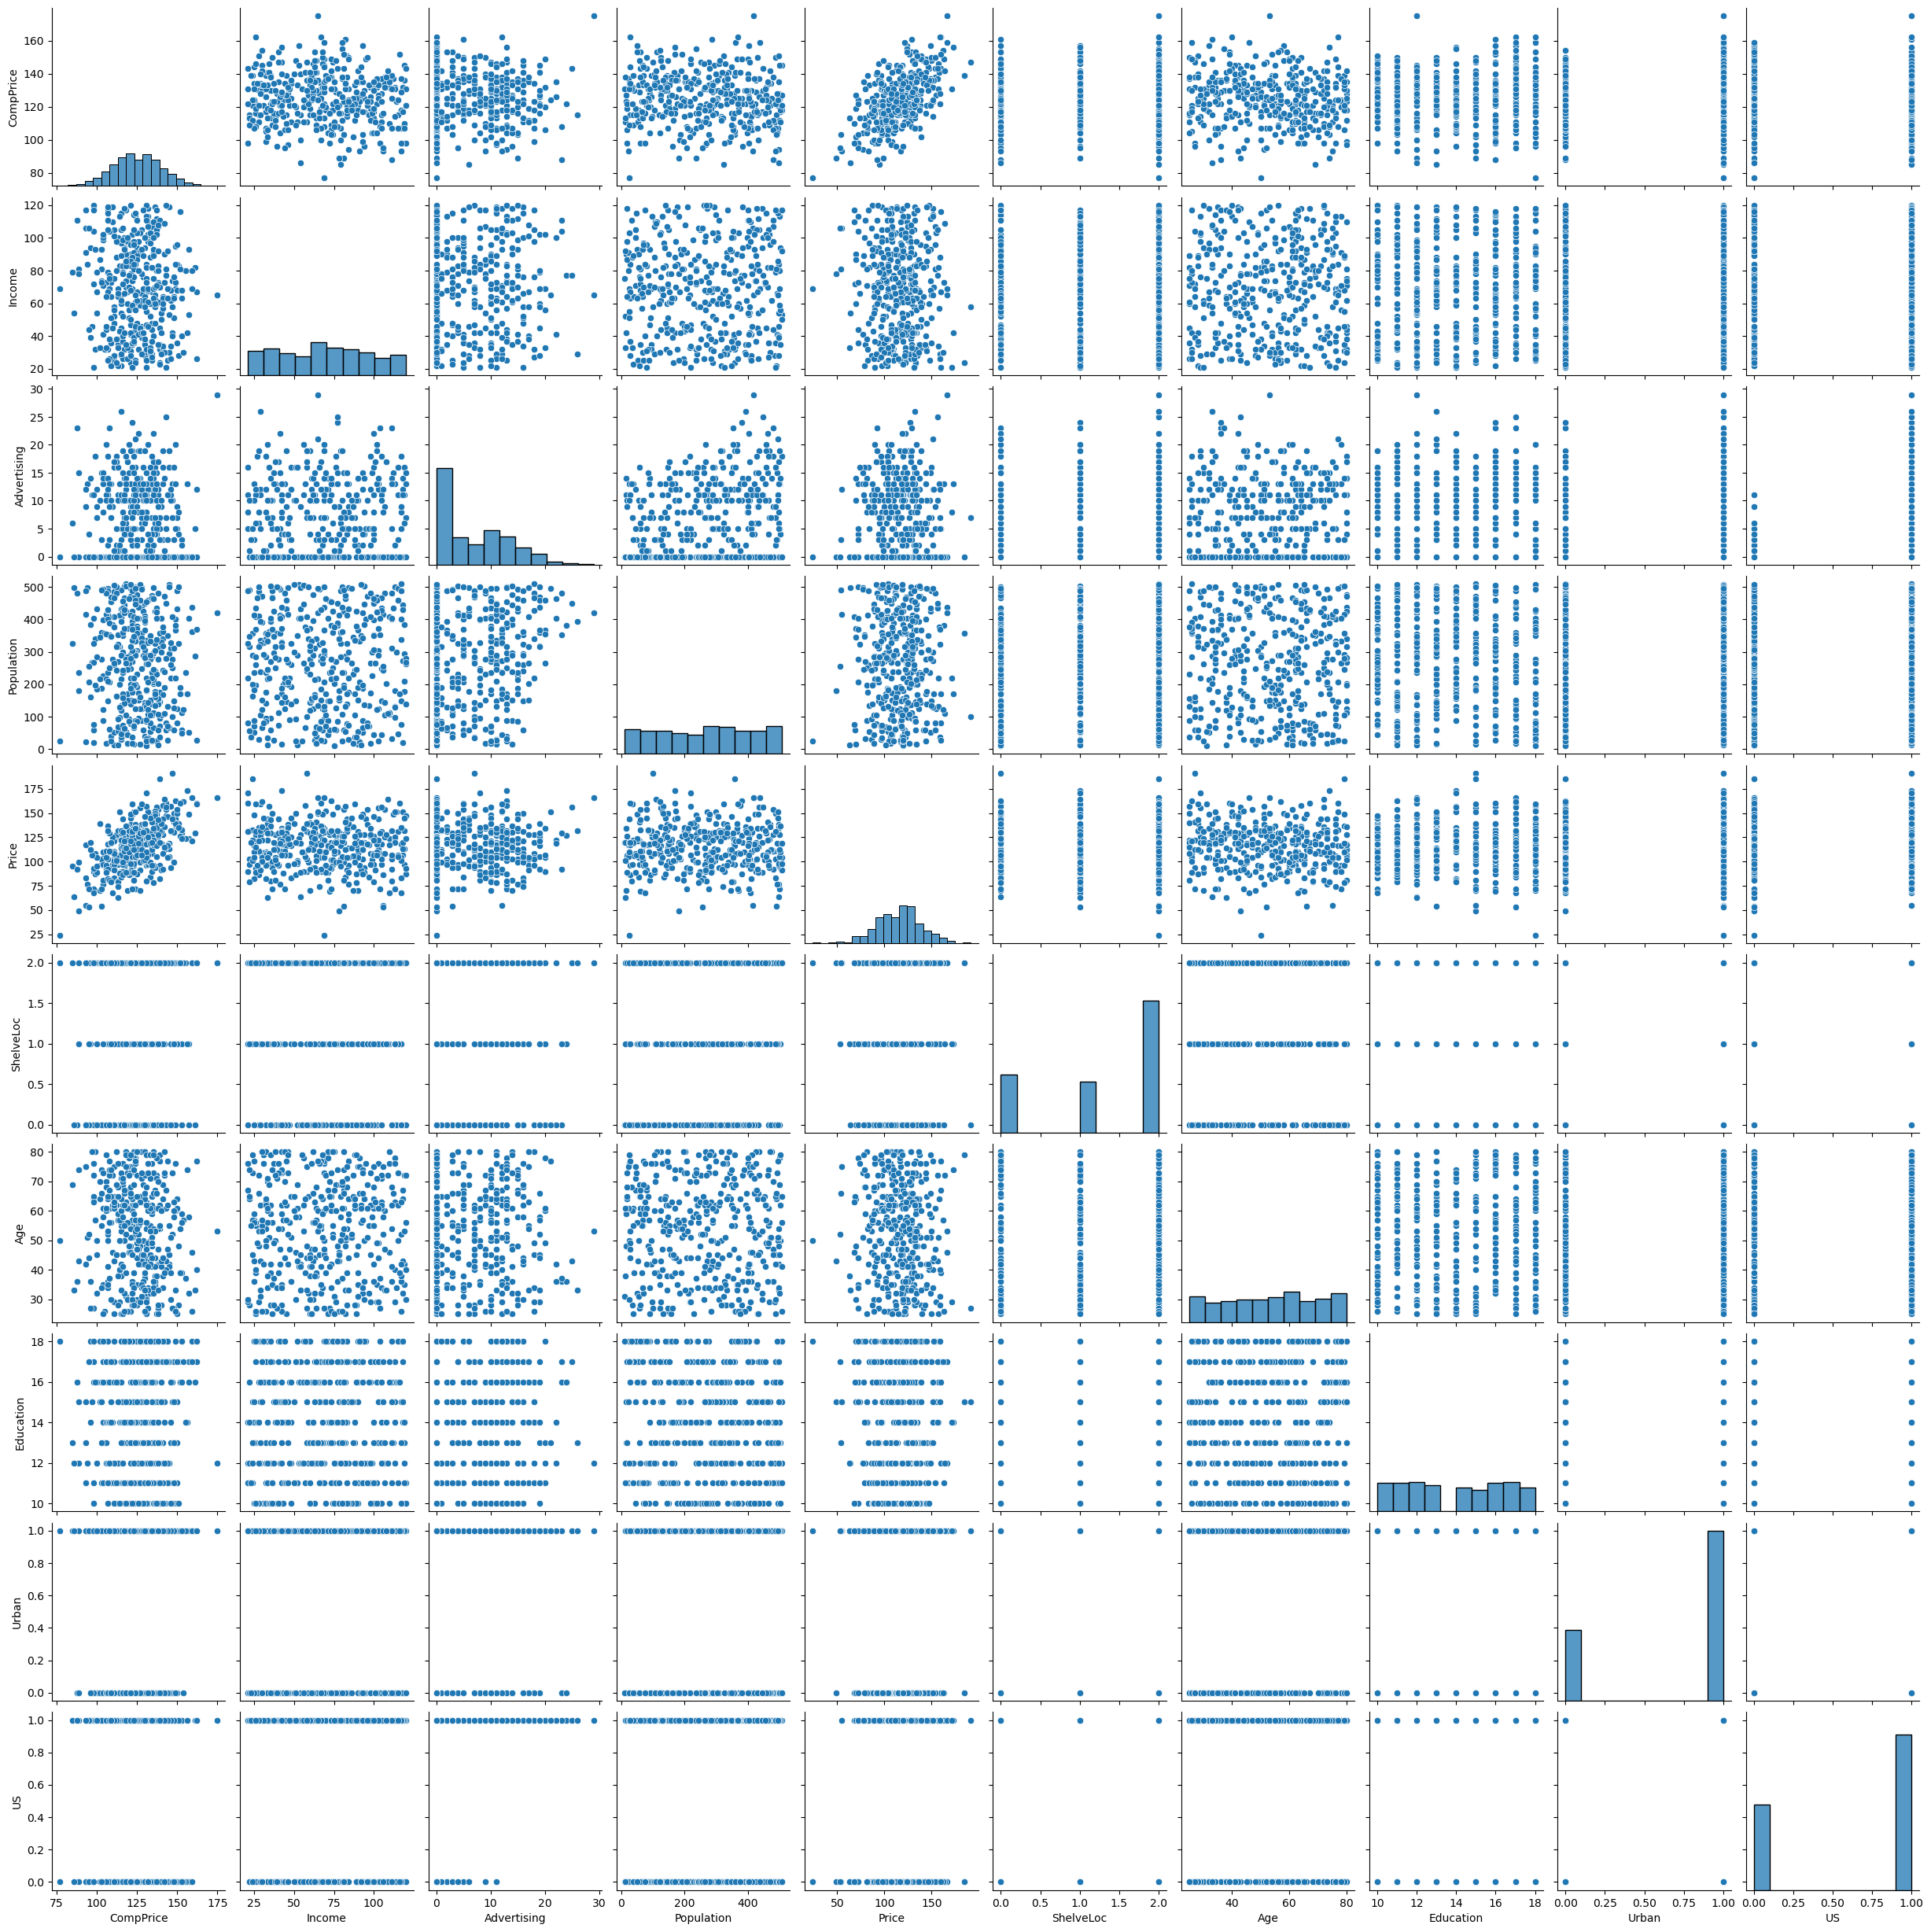

In [51]:
sns.pairplot(df)

<AxesSubplot:xlabel='Price', ylabel='Sales'>

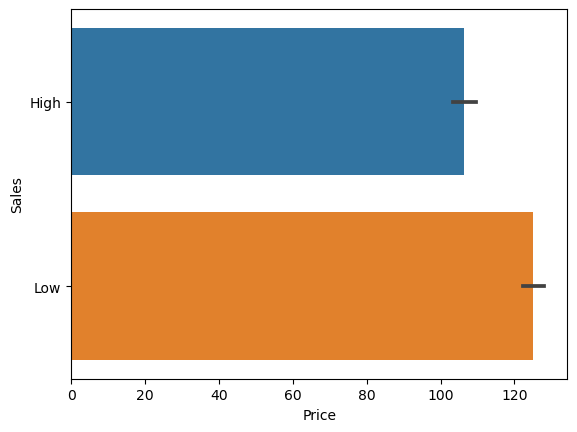

In [54]:
sns.barplot(x= 'Price', y ='Sales',data=df)

<AxesSubplot:>

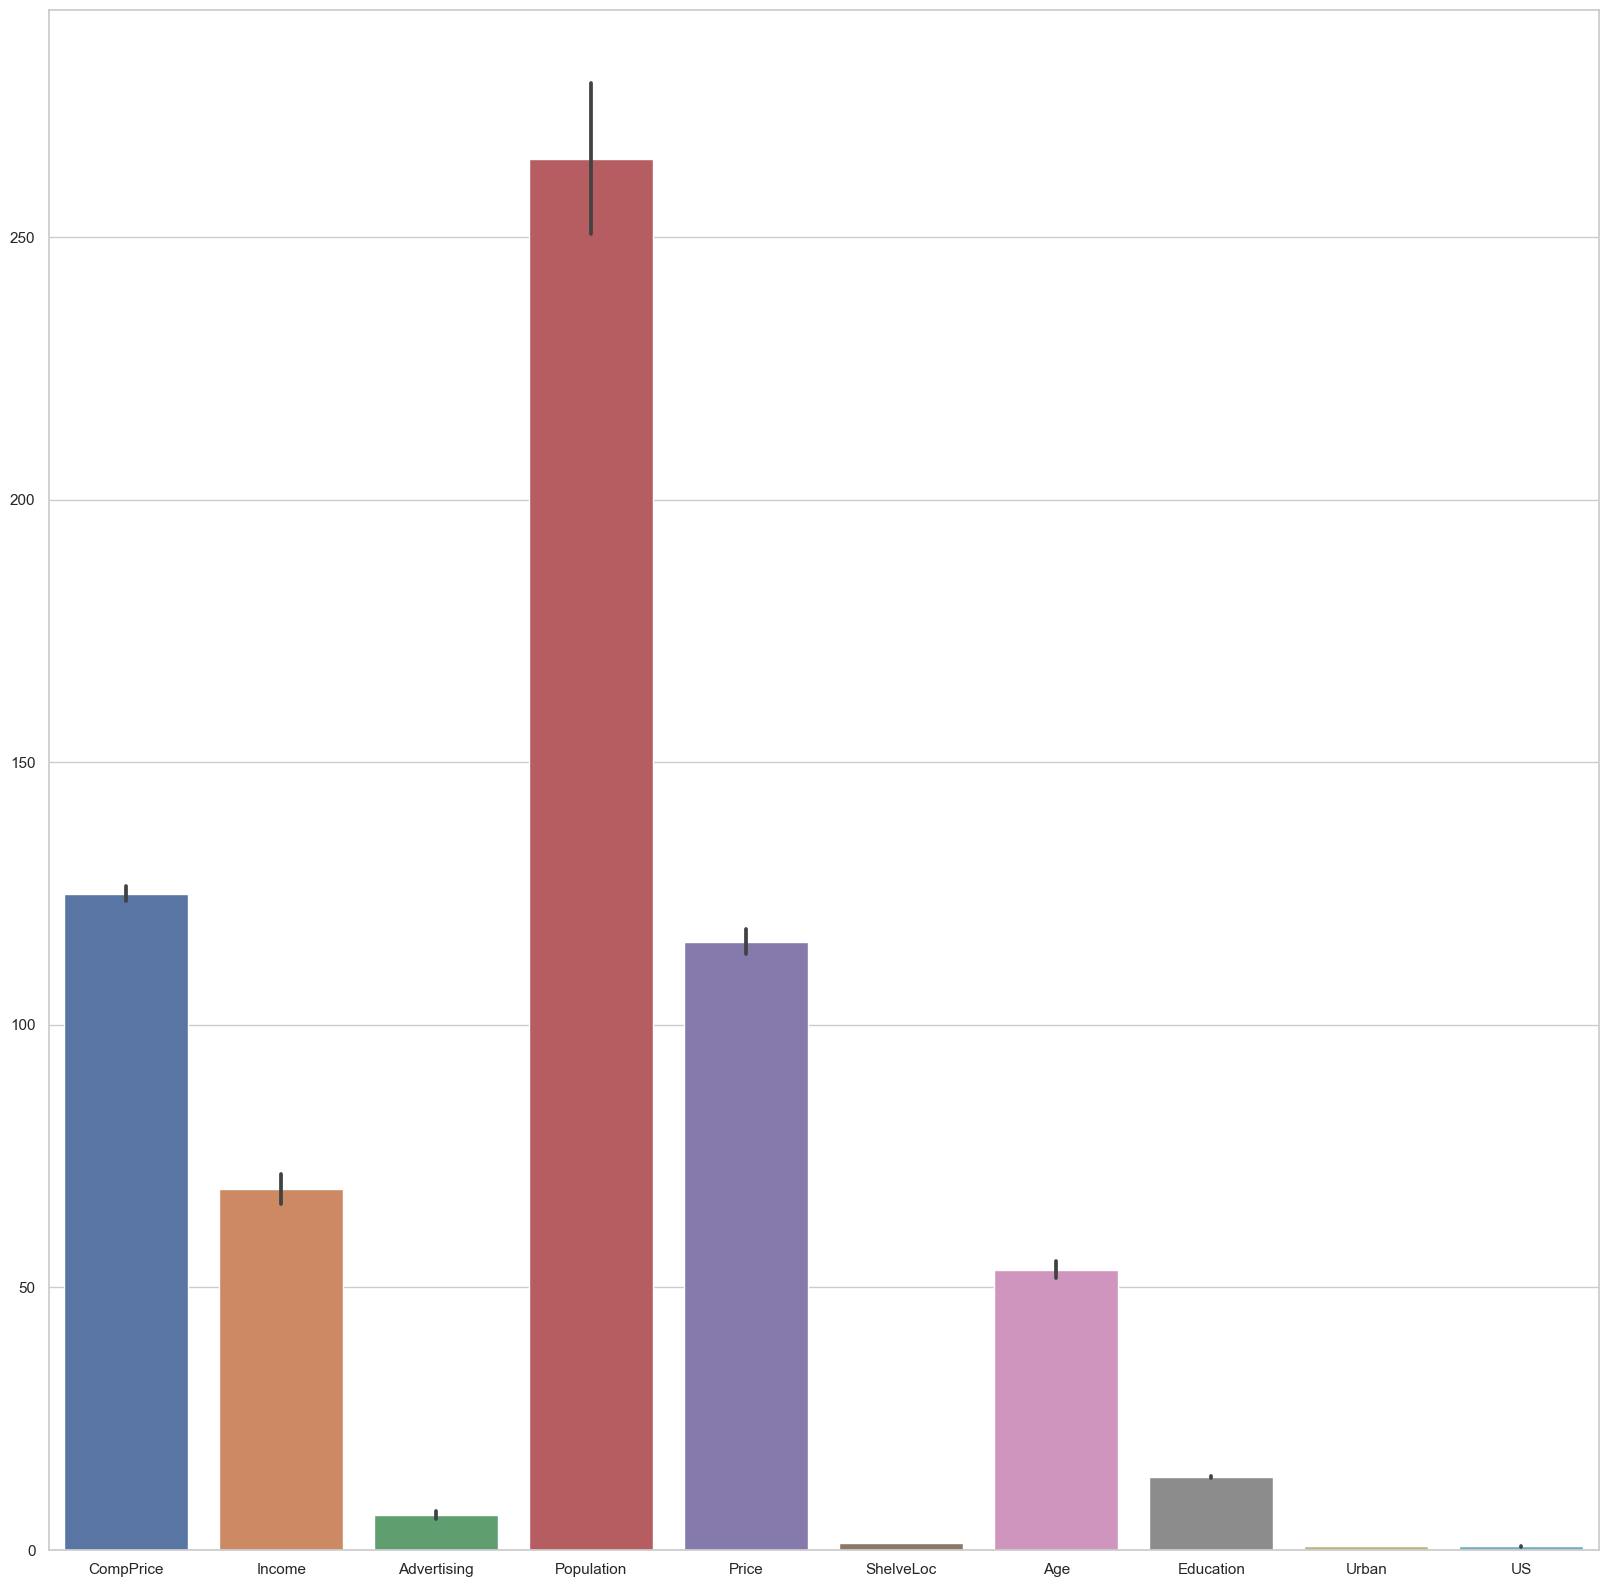

In [57]:
sns.set_theme(style="whitegrid")
plt.figure(figsize=(20,20))
sns.barplot(data=df)

In [10]:
# Assiging dependent and independent variable
X = df.iloc[:,1:]
X

,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,138,73,11,276,120,0,42,17,1,1
1,111,48,16,260,83,1,65,10,1,1
2,113,35,10,269,80,2,59,12,1,1
3,117,100,4,466,97,2,55,14,1,1
4,141,64,3,340,128,0,38,13,1,0
...,...,...,...,...,...,...,...,...,...,...
395,138,108,17,203,128,1,33,14,1,1
396,139,23,3,37,120,2,55,11,0,1
397,162,26,12,368,159,2,40,18,1,1
398,100,79,7,284,95,0,50,12,1,1


In [11]:
Y = df.iloc[:,0]
Y

0      High
1      High
2      High
3       Low
4       Low
       ... 
395    High
396     Low
397     Low
398     Low
399    High
Name: Sales, Length: 400, dtype: object

In [12]:
Y.unique

<bound method Series.unique of 0      High
1      High
2      High
3       Low
4       Low
       ... 
395    High
396     Low
397     Low
398     Low
399    High
Name: Sales, Length: 400, dtype: object>

In [14]:
Y.value_counts()

Low     201
High    199
Name: Sales, dtype: int64

# Splitting the data into train and test data sets

In [15]:
X_train, X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.2,random_state=1)

# Building Decision Tree Classifier (CART) using Entropy Criteria

# Building model

In [16]:

model = DecisionTreeClassifier(criterion='entropy',max_depth=3)
model.fit(X_train,Y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3)

[Text(0.5, 0.875, 'X[4] <= 92.5\nentropy = 1.0\nsamples = 320\nvalue = [159, 161]'),
 Text(0.25, 0.625, 'X[0] <= 99.5\nentropy = 0.414\nsamples = 48\nvalue = [44, 4]'),
 Text(0.125, 0.375, 'X[1] <= 49.0\nentropy = 0.845\nsamples = 11\nvalue = [8, 3]'),
 Text(0.0625, 0.125, 'entropy = 0.0\nsamples = 2\nvalue = [0, 2]'),
 Text(0.1875, 0.125, 'entropy = 0.503\nsamples = 9\nvalue = [8, 1]'),
 Text(0.375, 0.375, 'X[4] <= 90.5\nentropy = 0.179\nsamples = 37\nvalue = [36, 1]'),
 Text(0.3125, 0.125, 'entropy = 0.0\nsamples = 32\nvalue = [32, 0]'),
 Text(0.4375, 0.125, 'entropy = 0.722\nsamples = 5\nvalue = [4, 1]'),
 Text(0.75, 0.625, 'X[5] <= 0.5\nentropy = 0.983\nsamples = 272\nvalue = [115, 157]'),
 Text(0.625, 0.375, 'X[2] <= 1.0\nentropy = 0.549\nsamples = 63\nvalue = [8, 55]'),
 Text(0.5625, 0.125, 'entropy = 0.0\nsamples = 24\nvalue = [0, 24]'),
 Text(0.6875, 0.125, 'entropy = 0.732\nsamples = 39\nvalue = [8, 31]'),
 Text(0.875, 0.375, 'X[5] <= 1.5\nentropy = 1.0\nsamples = 209\nvalue =

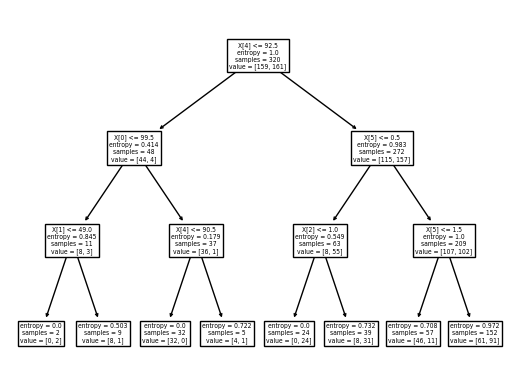

In [17]:
tree.plot_tree(model)

Text(0.5, 1.0, 'Decision Tree Based on Entropy')

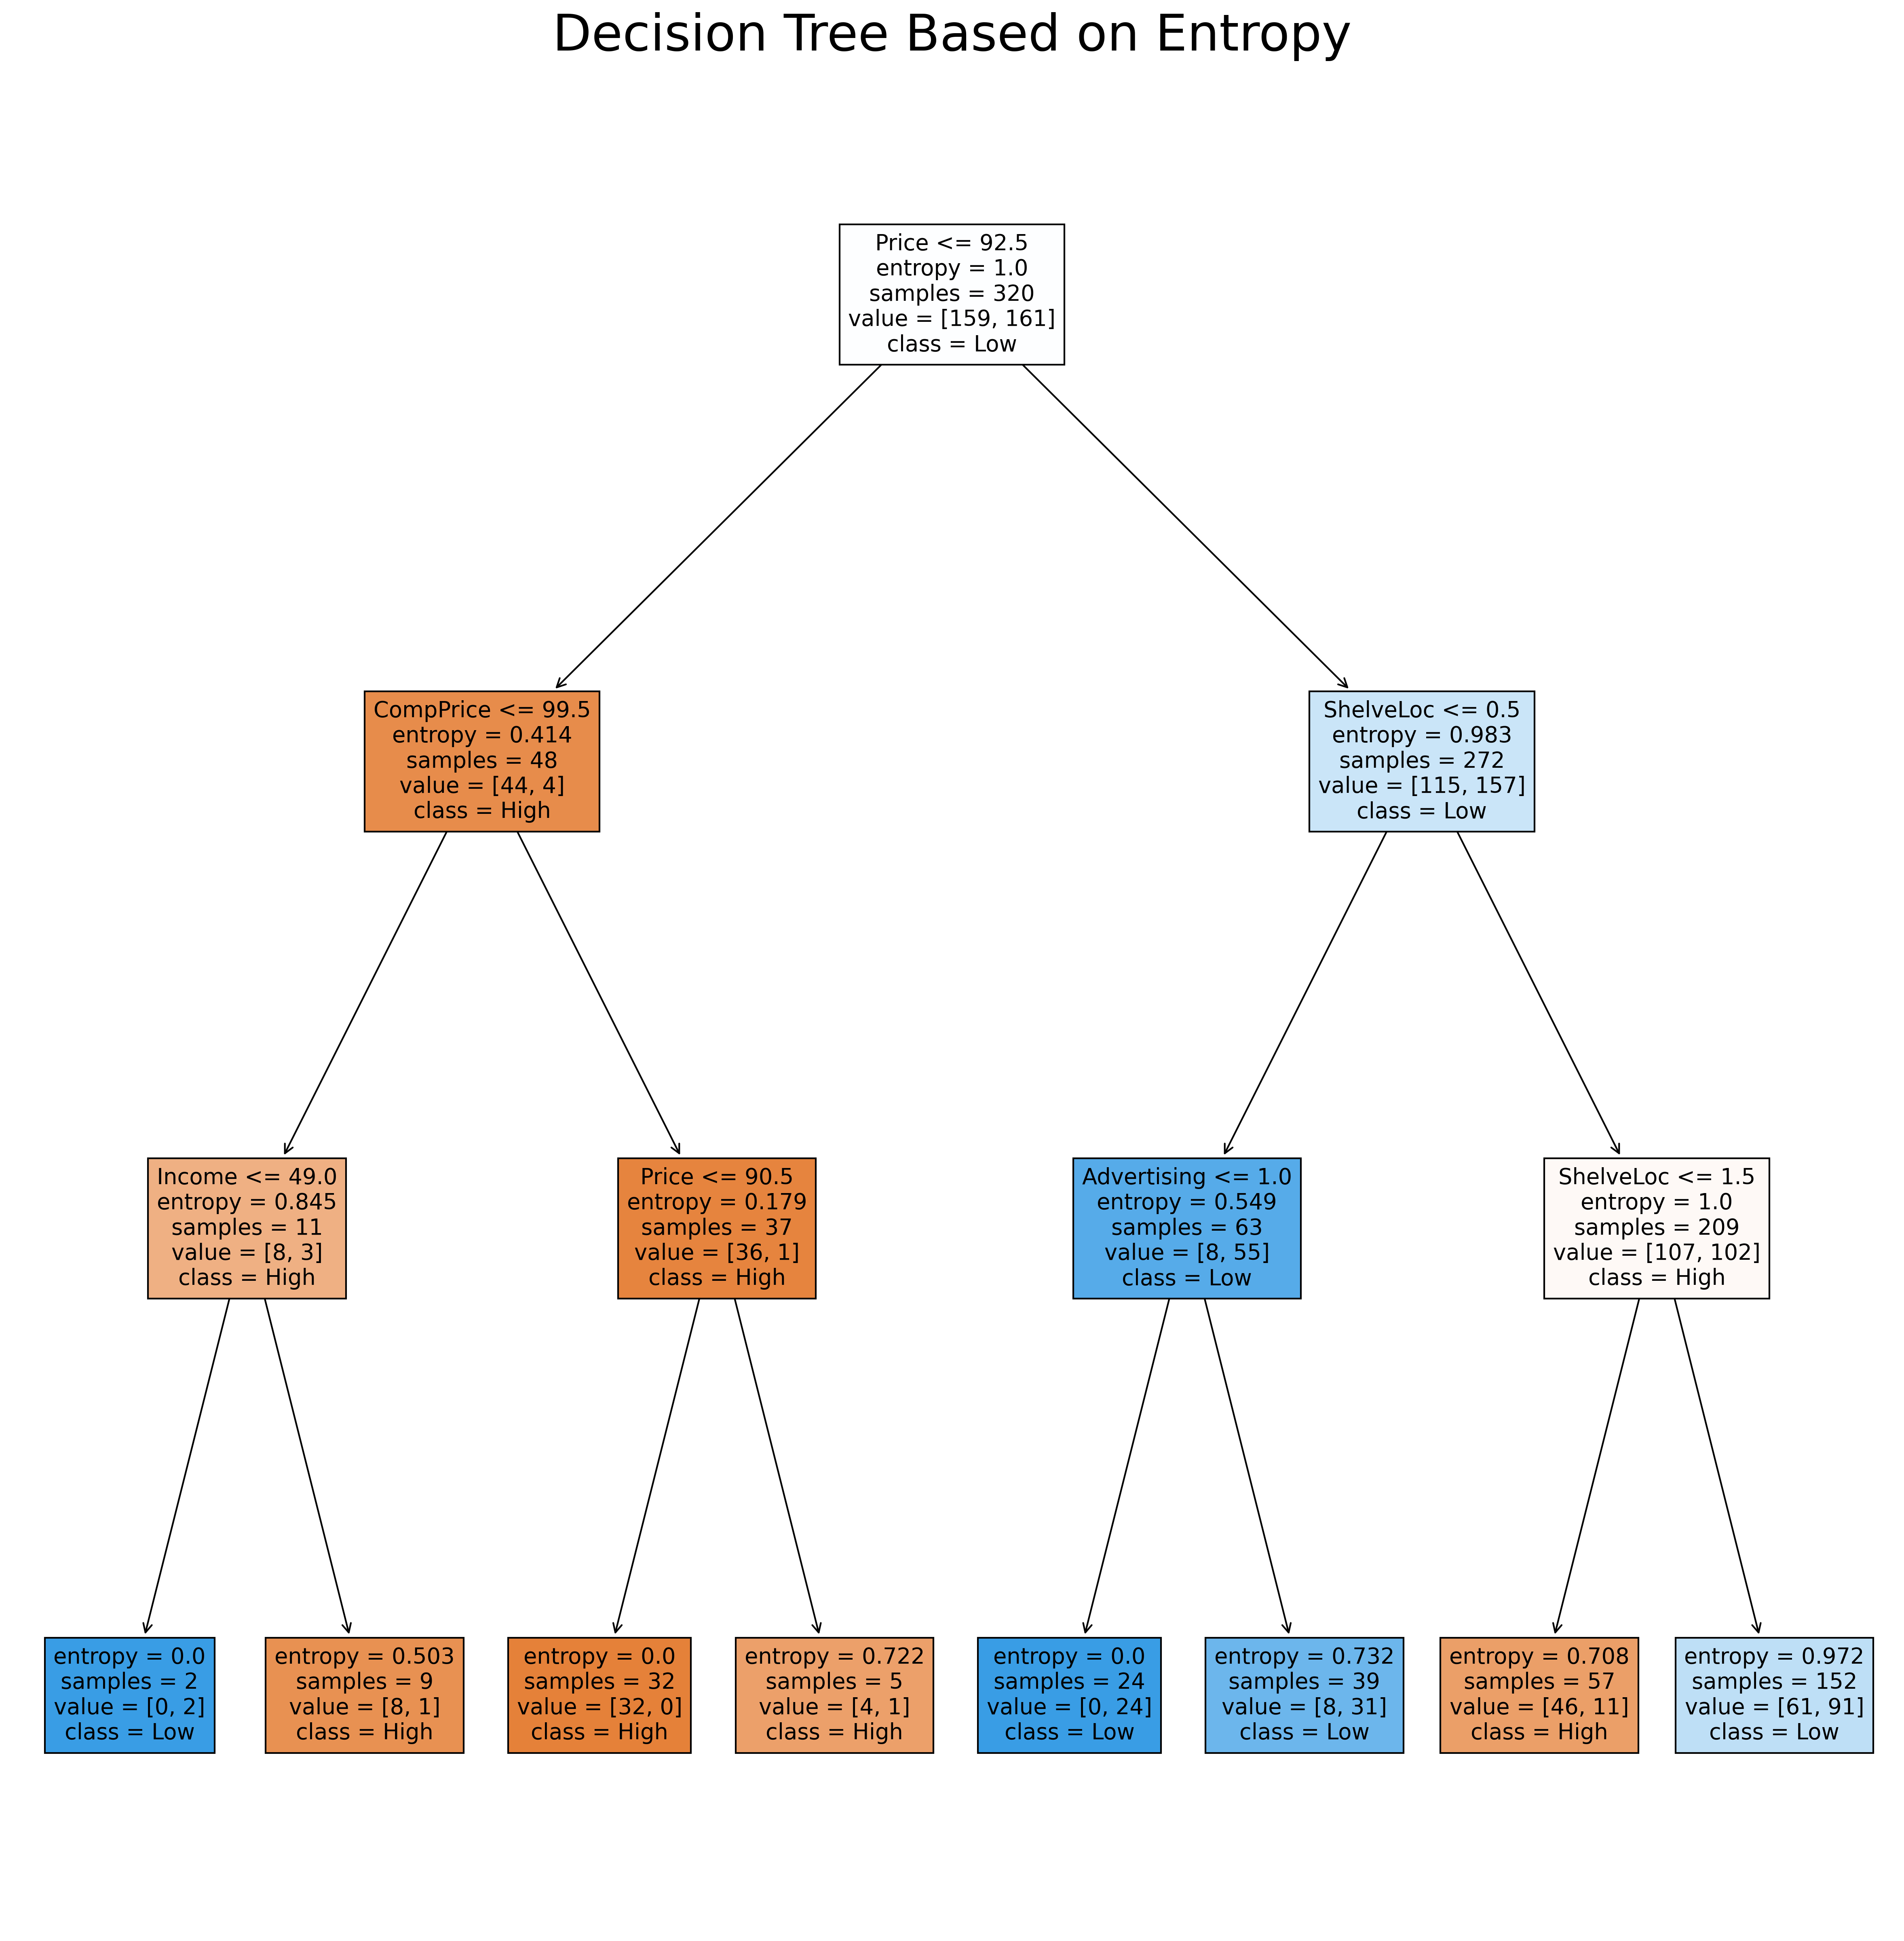

In [21]:
fn = ['CompPrice','Income','Advertising','Population','Price','ShelveLoc','Age','Education','Urban','US']
cn = ['High','Low']
fig, axes = plt.subplots(nrows = 1,ncols=1,figsize=(20,20),dpi=300)
tree.plot_tree(model, feature_names= fn, class_names= cn ,filled =True)
plt.title('Decision Tree Based on Entropy',fontsize=30)

In [22]:
#Predicting based on the trained entropy based model
pred = model.predict(X_test)
pd.Series(pred).value_counts()

Low     54
High    26
dtype: int64

In [23]:
#Cross validation
pd.crosstab(Y_test,pred)

col_0,High,Low
Sales,,
High,20,20
Low,6,34


In [25]:
#Accuracy
np.mean(pred==Y_test)

0.675

In [26]:
#Features with importance based on above model
model.feature_importances_

array([0.04127363, 0.05006672, 0.06343714, 0.        , 0.37629831,
       0.4689242 , 0.        , 0.        , 0.        , 0.        ])

# Building Decision Tree Classifier (CART) using Gini Criteria

In [30]:
model_gini = DecisionTreeClassifier(criterion='gini',max_depth=3)
model_gini.fit(X_train,Y_train)

DecisionTreeClassifier(max_depth=3)

[Text(0.4230769230769231, 0.875, 'X[4] <= 92.5\ngini = 0.5\nsamples = 320\nvalue = [159, 161]'),
 Text(0.15384615384615385, 0.625, 'X[1] <= 21.5\ngini = 0.153\nsamples = 48\nvalue = [44, 4]'),
 Text(0.07692307692307693, 0.375, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(0.23076923076923078, 0.375, 'X[2] <= 4.5\ngini = 0.12\nsamples = 47\nvalue = [44, 3]'),
 Text(0.15384615384615385, 0.125, 'gini = 0.245\nsamples = 21\nvalue = [18, 3]'),
 Text(0.3076923076923077, 0.125, 'gini = 0.0\nsamples = 26\nvalue = [26, 0]'),
 Text(0.6923076923076923, 0.625, 'X[5] <= 0.5\ngini = 0.488\nsamples = 272\nvalue = [115, 157]'),
 Text(0.5384615384615384, 0.375, 'X[2] <= 15.5\ngini = 0.222\nsamples = 63\nvalue = [8, 55]'),
 Text(0.46153846153846156, 0.125, 'gini = 0.16\nsamples = 57\nvalue = [5, 52]'),
 Text(0.6153846153846154, 0.125, 'gini = 0.5\nsamples = 6\nvalue = [3, 3]'),
 Text(0.8461538461538461, 0.375, 'X[5] <= 1.5\ngini = 0.5\nsamples = 209\nvalue = [107, 102]'),
 Text(0.7692307692307693, 0

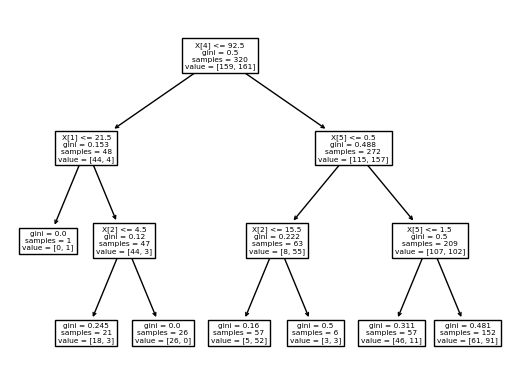

In [31]:
tree.plot_tree(model_gini)

Text(0.5, 1.0, 'Decision Tree using Gini Index')

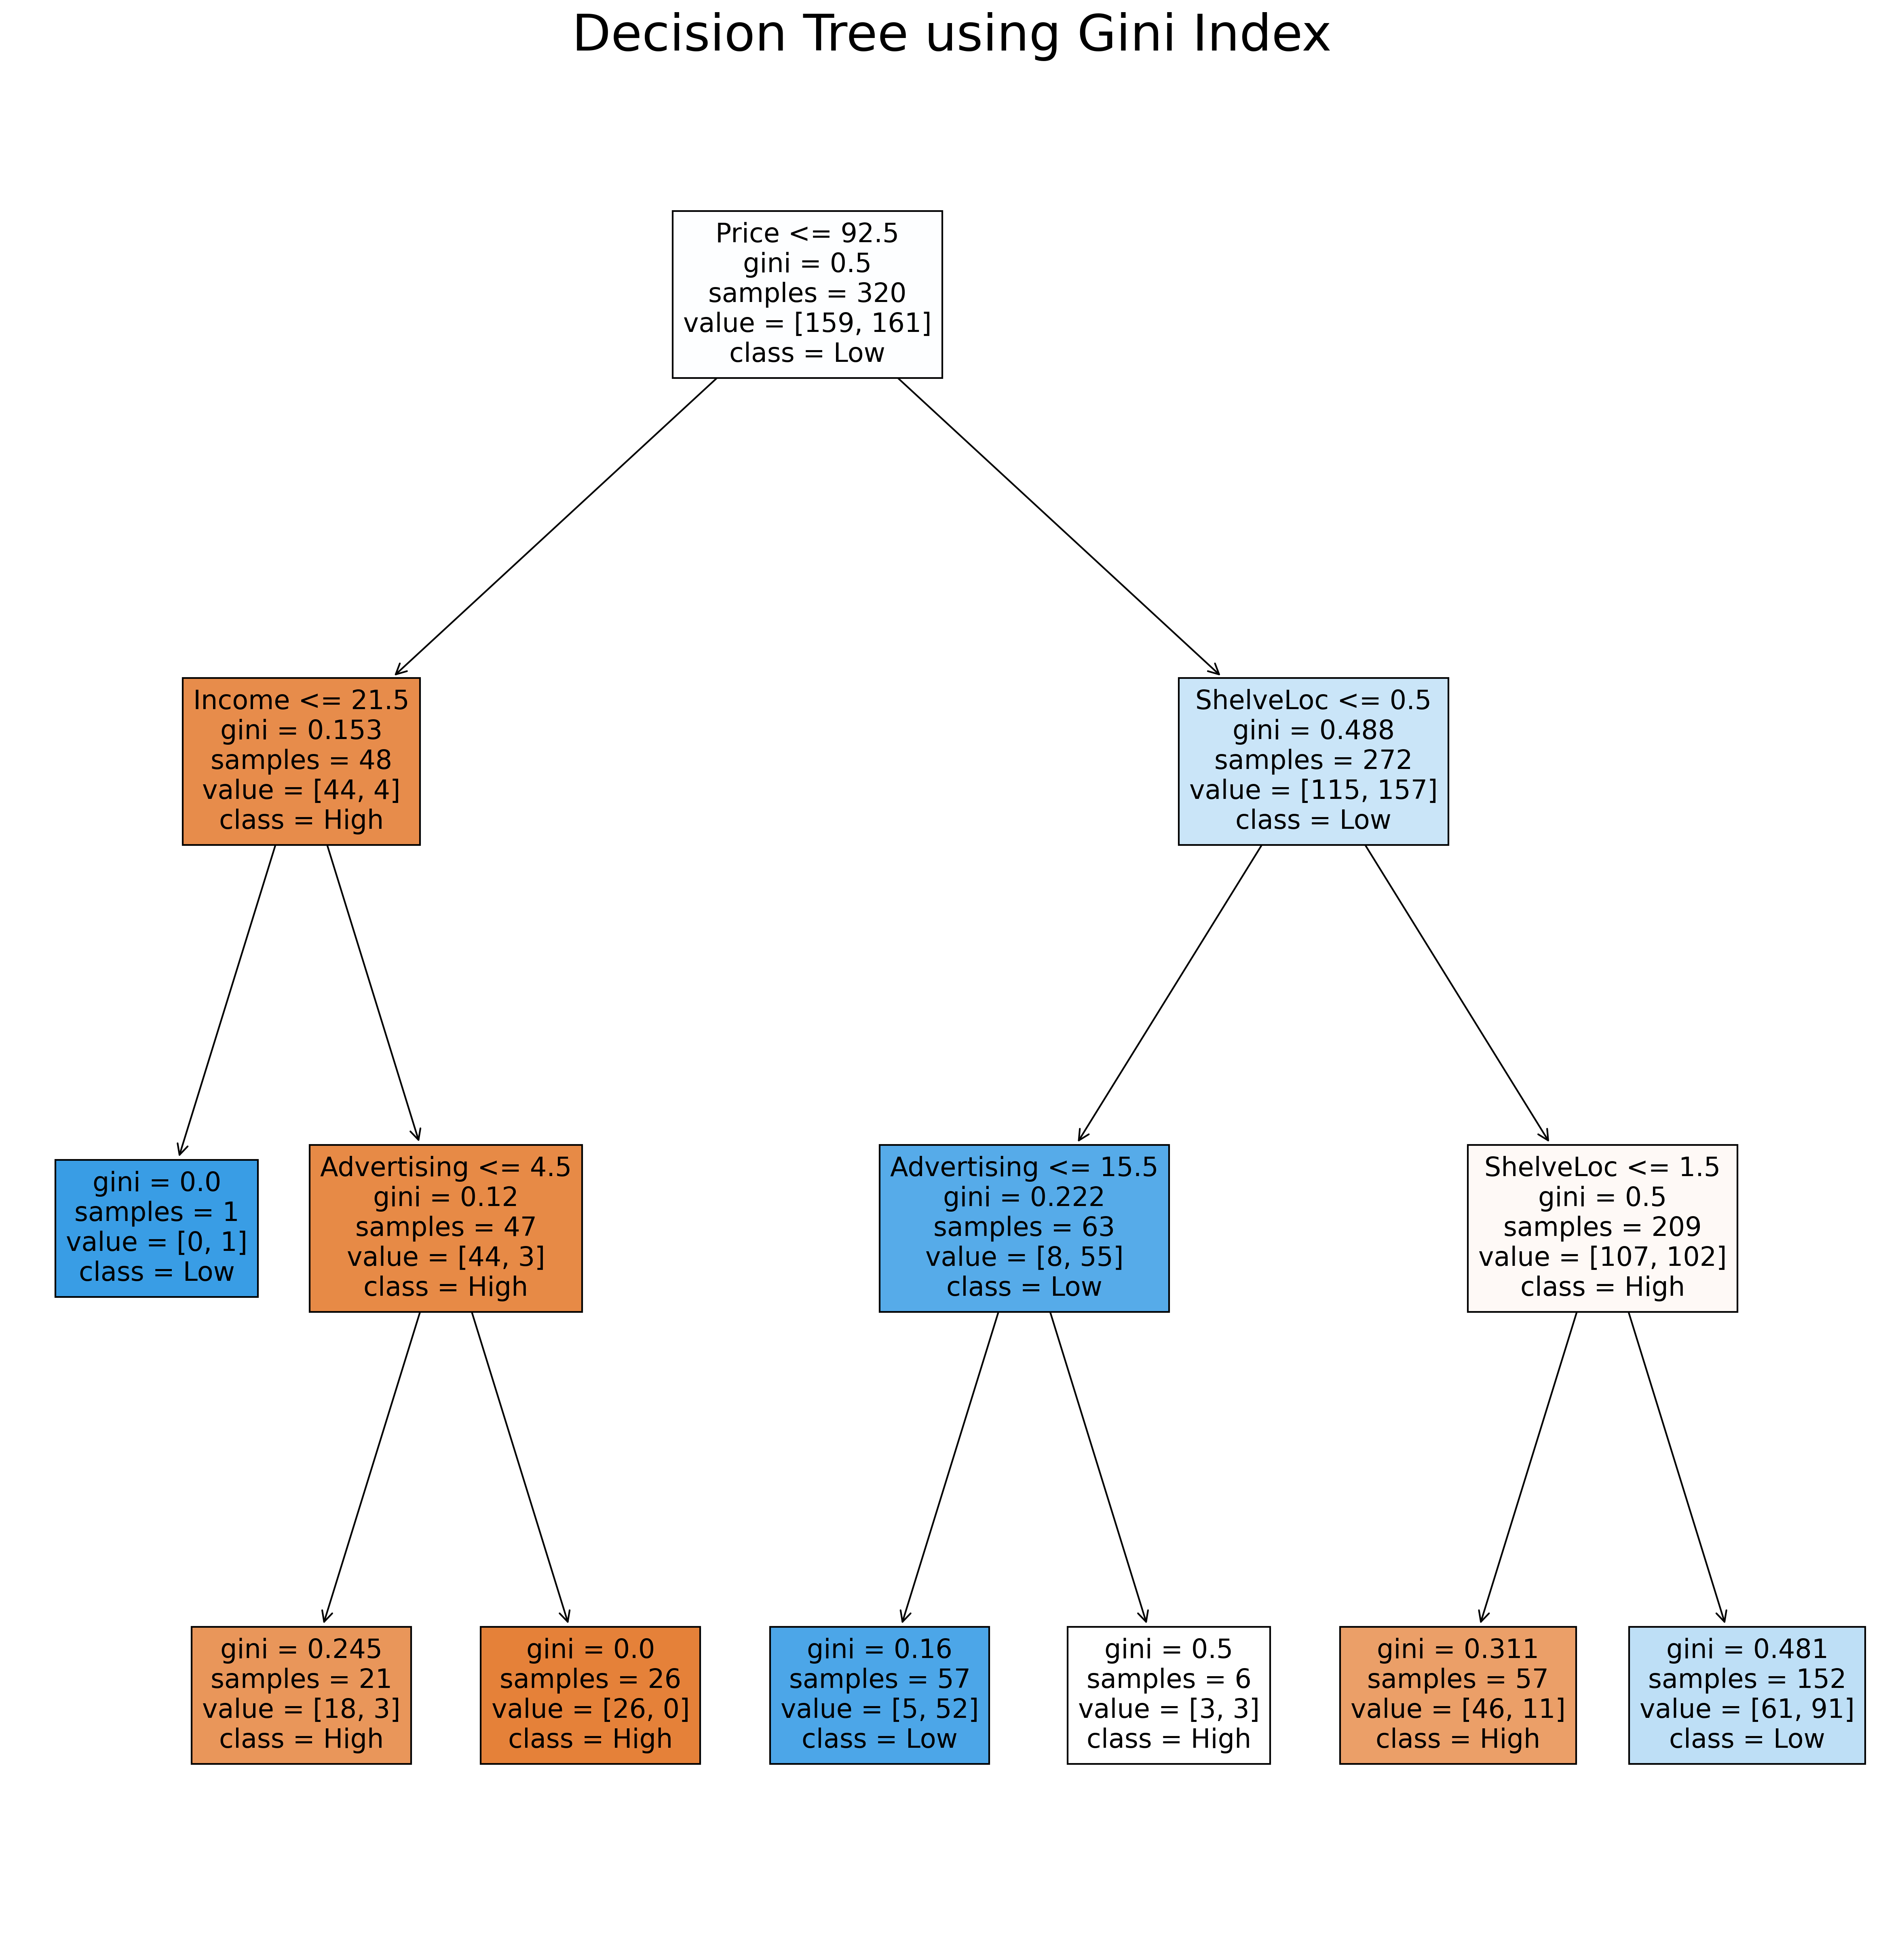

In [33]:
fn = ['CompPrice','Income','Advertising','Population','Price','ShelveLoc','Age','Education','Urban','US']
cn = ['High','Low']
fig,axes = plt.subplots(nrows=1, ncols=1,figsize=(20,20), dpi=300)
tree.plot_tree(model_gini,feature_names=fn, class_names=cn, filled=True)
plt.title('Decision Tree using Gini Index',fontsize=30)

In [35]:
#Predicting based on the trained gini based model
pred_gini = model_gini.predict(X_test)
pred_gini

array(['Low', 'High', 'Low', 'High', 'High', 'Low', 'Low', 'High', 'Low',
       'Low', 'Low', 'Low', 'High', 'Low', 'Low', 'Low', 'Low', 'High',
       'Low', 'Low', 'Low', 'Low', 'Low', 'Low', 'High', 'Low', 'Low',
       'Low', 'Low', 'Low', 'High', 'Low', 'Low', 'Low', 'Low', 'High',
       'Low', 'Low', 'Low', 'Low', 'Low', 'Low', 'High', 'Low', 'Low',
       'Low', 'Low', 'Low', 'High', 'High', 'Low', 'High', 'High', 'High',
       'High', 'Low', 'High', 'Low', 'High', 'High', 'Low', 'Low', 'High',
       'High', 'Low', 'Low', 'Low', 'Low', 'High', 'Low', 'Low', 'Low',
       'High', 'Low', 'High', 'High', 'Low', 'Low', 'High', 'Low'],
      dtype=object)

In [36]:
pd.Series(pred_gini).value_counts()

Low     54
High    26
dtype: int64

In [37]:
#Cross validation
pd.crosstab(Y_test,pred_gini)

col_0,High,Low
Sales,,
High,20,20
Low,6,34


In [39]:
#Accuracy
np.mean(pred_gini==Y_test)

0.675

In [50]:
#Best features based on gini model
model_gini.feature_importances_

array([0.        , 0.0330478 , 0.0446644 , 0.        , 0.38323597,
       0.53905182, 0.        , 0.        , 0.        , 0.        ])

In [47]:
#Creating a series out of features score
fn = ['CompPrice', 'Income', 'Advertising', 'Population', 'Price',
       'ShelveLoc', 'Age', 'Education', 'Urban', 'US']
F_entropy= pd.Series(model.feature_importances_,index=fn).sort_values(ascending=False)
F_entropy

ShelveLoc      0.468924
Price          0.376298
Advertising    0.063437
Income         0.050067
CompPrice      0.041274
Population     0.000000
Age            0.000000
Education      0.000000
Urban          0.000000
US             0.000000
dtype: float64

In [48]:
#Creating a series of features scores
fn = ['CompPrice', 'Income', 'Advertising', 'Population', 'Price',
       'ShelveLoc', 'Age', 'Education', 'Urban', 'US']
F_gini= pd.Series(model_gini.feature_importances_,index=fn).sort_values(ascending=False)
F_gini

ShelveLoc      0.539052
Price          0.383236
Advertising    0.044664
Income         0.033048
CompPrice      0.000000
Population     0.000000
Age            0.000000
Education      0.000000
Urban          0.000000
US             0.000000
dtype: float64

In [49]:

Final = {'F_entropy':F_entropy,'F_gini':F_gini}
pd.concat(Final,axis=1,sort=False)

,F_entropy,F_gini
ShelveLoc,0.468924,0.539052
Price,0.376298,0.383236
Advertising,0.063437,0.044664
Income,0.050067,0.033048
CompPrice,0.041274,0.000000
Population,0.000000,0.000000
Age,0.000000,0.000000
Education,0.000000,0.000000
Urban,0.000000,0.000000
US,0.000000,0.000000
